<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 14: Animations

In this Notebook, we learn how to make animations with `matplotlib`

### Animiations
The process to make animations with `matplotlib` works as follows:
1. Create a figure
2. Store the features (for example lines or circles) of the figure that you want to change in variables
3. Write a function that can change the data of these features (for example, the $x,y$ locations of the line, or the radius of the circle).
4. Use the `FuncAnimation` function of the `animation` subpackage of `matplotlib` to create an animated figure.

Animations only work inside a Notebook when you specify figures to be created in the Notebook as `%matplotlib notebook` (rather than `matplotlib inline` as we used so far). We also import the `matplotlib.animation` package and call it `animation`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

Now, let's see how we can create a function that can change features in a figure. For example, let's make a figure with a line, but let's not specify the points of the line. So both $x$ and $y$ are empty lists. The `plot` command returns a list of lines, but since there is only one line, you can store it as 

    line, = plt.plot([], [], 'b')
    
Note that if you forget the comma after `line`, then line is a list with one item (try it out!).
Each `line` has a `set_data` function which you can use to change the data.

We write a function, called `update_function` here,  to change the $x$ and $y$ values of the line. 
The `update_line` function takes two arguments: the counter `i` and the line that needs to be changed. 

Now we are ready to make an animation. An animation can be created with the `FuncAnimation` function. The `FuncAnimation` function takes two arguments: the figure that needs to be animated and the function that needs to be called for every frame of the animation (in this case `update_line`). The keyword arguments of `FuncAnimation` that we will use are the `fargs`, which is a list of arguments that is passed to the function that is called to update the frame. In our case that is just the `line`. When `FuncAnimation` calls the `update_line` function, its first argument is always the number of the frame, followed by the items in `fargs`. The `interval` keyword argument specifies the number of milliseconds a new frame is drawn (provided the computations on your machine are fast enough). Other keyword arguments include `frames`, which is the number of frames that are drawn (default is `None`, so it keeps going forever), and `repeat`, whether the animation keeps repeating if you have specified a finite number of frames (default is `True`). 

Run the code below. You can stop the animation by clicking the blue *off* button at the upper right-hand corner of the figure.

<IPython.core.display.Javascript object>


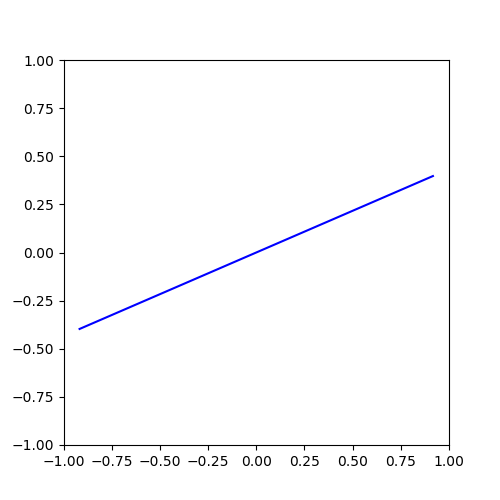

In [2]:
def update_line(i, line):
    angle = i * np.pi / 100
    line.set_data([-np.cos(angle), np.cos(angle)], [-np.sin(angle), np.sin(angle)])

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111, aspect='equal', xlim=(-1, 1), ylim=(-1, 1))
line, = plt.plot([], [], 'b')

animation.FuncAnimation(fig, update_line, fargs=[line], interval=50)

# Example using frames and repeat kewords
#animation.FuncAnimation(fig, update_line, fargs=[line], interval=50, frames=20, repeat=False)

### Exercise 1. Animation of a circle
Create an animation where a small circle with radius 1 moves along the circumference of a large circle with radius 5. Use the `Circle` patch of `matplotlib.patches` to draw the circle. 

<IPython.core.display.Javascript object>


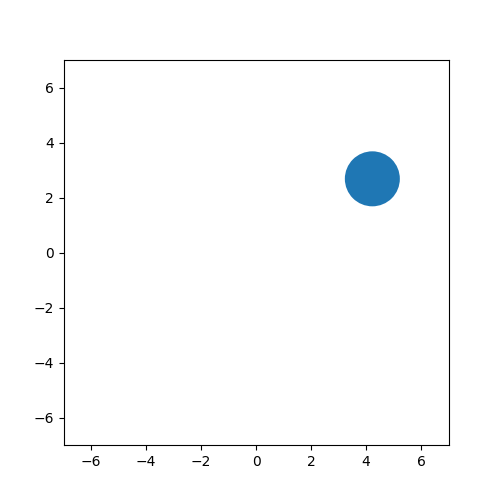

In [3]:
def update_center(i, circle):
    angle = i * 2 * np.pi / 100
    circle.center=([5 * np.cos(angle), 5 * np.sin(angle)])

fig = plt.figure(figsize=(5,5))
from matplotlib.patches import Circle
ax = plt.subplot(111, aspect='equal', xlim=(-7, 7), ylim=(-7, 7))
circle = Circle((5,0), radius = 1)
ax.add_patch(circle)

animation.FuncAnimation(fig, update_center, fargs=[circle], interval=100)

### Exercise 2. A pendulum.
Consider a swinging pendulum. For small swings, the pendulum may be approximated as a harmonic oscillator. The period $T$ of the pendulum as a function of its length may be approximated as

$$T=2\pi\sqrt{R/g}$$

where $R$ is the length of the pendulum and $g$ is the acceleration of gravity. The angle $\theta$ of the pendulum as a function of time (approximating the swing as a harmonic oscillator) may be written as

$$\theta(t)=\theta_0\cos(2\pi t/T)$$

where $\theta_0$ is the starting angle of the pendulum (measured with respect to vertical). More information on a pendulum can be found [here](https://en.wikipedia.org/wiki/Pendulum)

Create an animation of a pendulum where the initial angle is $\theta_0=30^\circ$ and the initial velocity is zero. Draw the cord as a line and the weight as a circle. Add a title to the figure that shows the time in seconds (so the time keeps going forward). You need to figure out how to change the text of a title. 

<IPython.core.display.Javascript object>


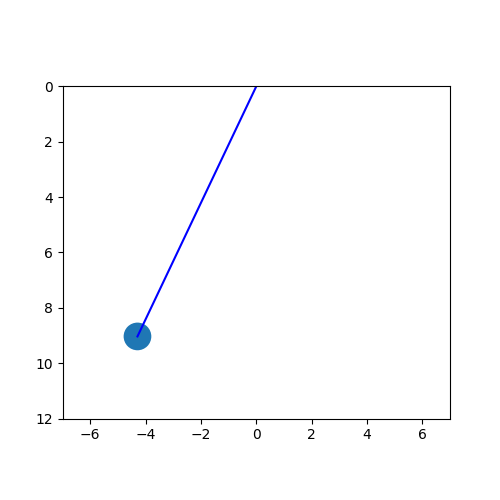

In [4]:
def update_line(i,line, circle):
    R = 10
    g = 9.8
    theta0 = 30 / 180 * np.pi
    T = 2 * np.pi * (R / g) ** 0.5
    theta = theta0 * np.cos(2 * np.pi * i / 10 / T)
    line.set_data([0, R * np.sin(theta)], [0, R * np.cos(theta)])
    circle.center = ([R * np.sin(theta), R * np.cos(theta)])

fig2 = plt.figure(figsize=(5,5), num = 'simple pendulum motion')
ax2 = plt.subplot(111, aspect='equal', xlim=(-7, 7), ylim=(12,0))
line, = plt.plot([], [], 'b')
circle = Circle((0,0), radius = 0.5)
ax2.add_patch(circle)

animation.FuncAnimation(fig2, update_line, fargs=[line, circle], interval= 50)

### Exercise 3. Polynomial and spline interpolation
Consider the following 11 data points

In [5]:
np.random.seed(20)
xdata = np.linspace(0,10,11)
ydata = np.random.randint(-10,10,11)

Fit a line through these 11 data points using: 

1. Linear interpolation (straight lines).
2. Cubic spline interpolation. Splines are pieces of third order polynomials that are fitted together such that the function and its slope are continuous.

Use the `interp1d` function of the `scipy.interpolate` package. Create an animation that shows all data points and then draws both lines simultaneously, starting at $x=0$ going to $x=10$ using at least 100 frames. Set the animation to repeat once it is done drawing.

<IPython.core.display.Javascript object>


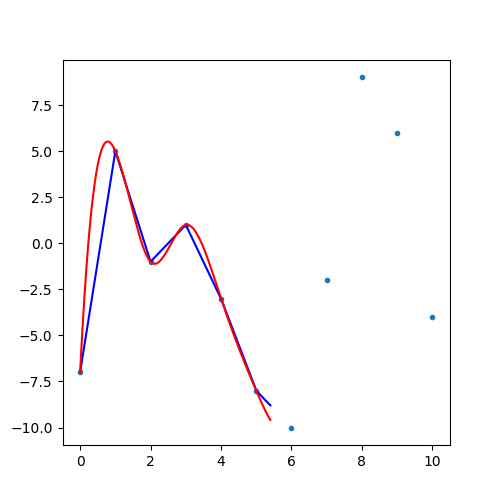

In [6]:
from scipy.interpolate import interp1d
fig = plt.figure(figsize=(5,5))
plt.plot(xdata, ydata, '.')
def update_line2(i, line, curve):
    xnew = np.linspace(0,(i % 101) / 100 * 10,1000)
    f1 = interp1d(xdata, ydata, kind='linear')
    f2 = interp1d(xdata, ydata, kind='cubic')
    line.set_data(xnew,f1(xnew))
    curve.set_data(xnew,f2(xnew))
line, = plt.plot([],[],'b')
curve, = plt.plot([],[],'r')
animation.FuncAnimation(fig, update_line2, fargs=[line, curve], interval = 100, repeat = True)
